# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
#boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [5]:
# Armo un DataFrame para visualizar mejor los datos
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
boston_df.describe().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [8]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

1. ¿De qué se trata el conjunto de datos?
   -  El conjunto de datos de Boston contiene información sobre las casas en Boston. El mismo contiene 506 muestras y 13 variables que caracterizan este conjunto de datos
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
   - La variable objetivo es la variable de nombre TARGET, el cual es el valor medio de las viviendas en $1000.
   
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
   -    Las variables disponibles son los siguientes:
            -   CRIM: tasa de delincuencia per cápita por ciudad
            -   ZN: Proporción del terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
            -   INDUS: Proporción  de acres no comerciales por ciudad
            -   CH: Variable ficticia de Charles River (= 1 si esta en el tramo que limita con el río; 0 en caso contrario)
            -   NOX: Concentración de óxidos nítricos (partes por 10 millon)
            -   RM: número medio de habitaciones por vivienda
            -   AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
            -   DIS: Distancias ponderadas a cinco centros de empleo de Boston
            -   RAD: Índice de accesibilidad a carreteras cercanas
            -   TAX: Tasa de impuesto a la propiedad de valor total por 10,000
            -   PTRATIO: Proporción alumno-profesor por municipio
            -   B:1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
            -   LSTAT: porcentaje de población de clase baja
            -   TARGET: Valor medio de las viviendas ocupadas por sus propietarios en $ 1000
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
   - RM:número medio de habitaciones por vivienda
   - TAX:Tasa de impuesto
   - DIS:Distancias ponderadas a cinco centros de empleo de Boston
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.
    -  Unos de los problemas encontrados es que el conjunto de datos ofrece información que no parecería ser relevante para la determinación del precio de la vivienda. Además hay variables que parecen ser discriminatorias y podrian introducir sesgos no deseados al momentos de la predicción, como B:1000 y LSTAT.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

**1. Responder acá**

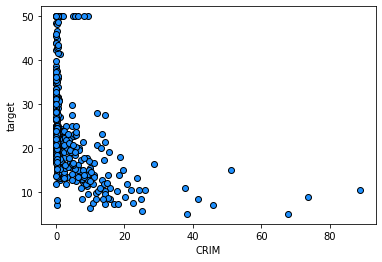

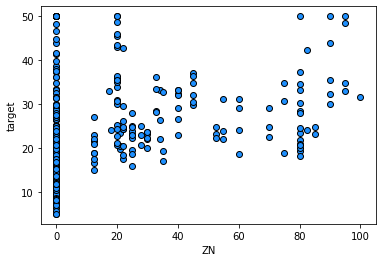

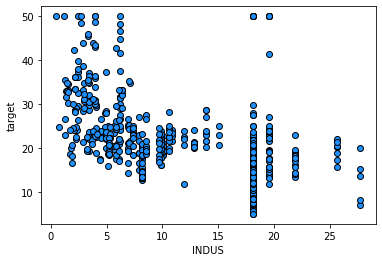

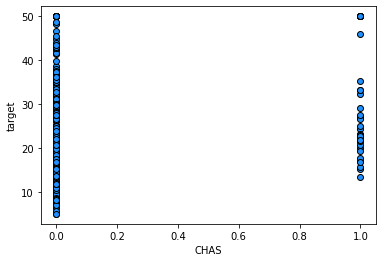

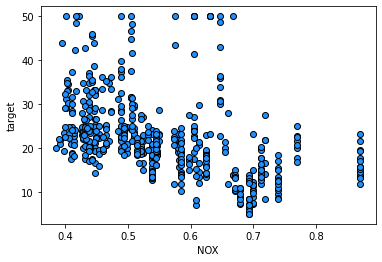

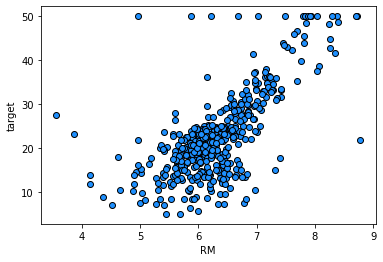

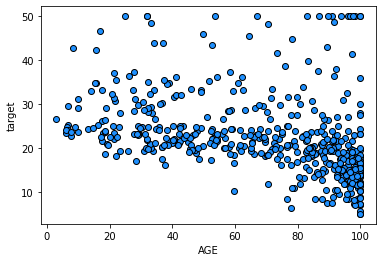

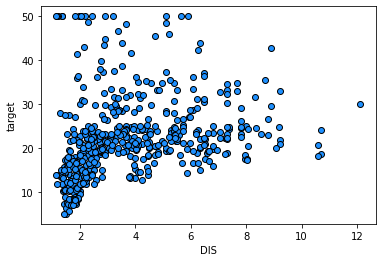

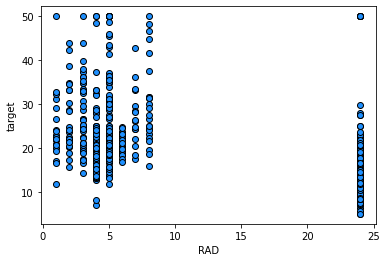

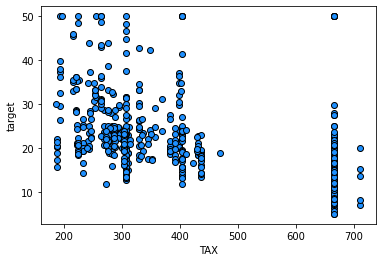

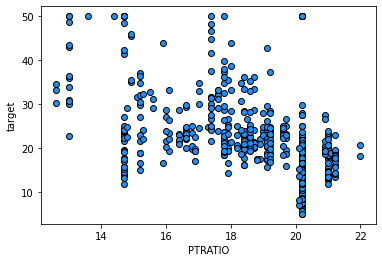

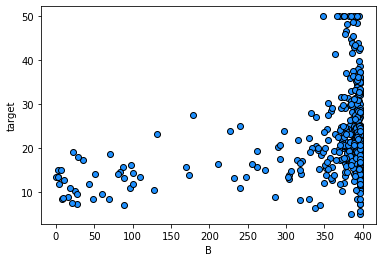

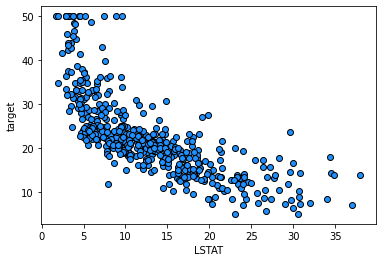

In [9]:
for i in range(len(boston['feature_names'])):
    feature = boston['feature_names'][i]
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.show()

**2. Responder acá**

In [10]:
# Propuesta: CRIM, NOX, RM, DIS, TAX, PTRATIO, LSTAT

**3. Responder acá**

In [11]:
# Orden a ojo: RM, LSTAT, NOX, TAX, PTRATIO, DIS, CRIM

In [12]:
# Voy a calcular el coeficiente de correlacion para ver si mas o menos coincide el orden
coefs = []
signs = []
for i in range(len(boston['feature_names'])):
    feature = boston['feature_names'][i]
    corr, _ = pearsonr(boston_df[feature], boston_df['TARGET'])
    coefs.append(corr)
    if corr >= 0:
        sign = '+1'
    else:
        sign = '-1'
    signs.append(sign)
pd.DataFrame(np.array([np.abs(coefs), signs]).T, index=boston['feature_names'], columns=['Coef. de corr. de Pearson', 'Signo']).sort_values('Coef. de corr. de Pearson', ascending=False)

,Coef. de corr. de Pearson,Signo
LSTAT,0.7376627261740147,-1
RM,0.6953599470715394,+1
PTRATIO,0.5077866855375613,-1
INDUS,0.48372516002837324,-1
TAX,0.46853593356776696,-1
NOX,0.42732077237328253,-1
CRIM,0.38830460858681154,-1
RAD,0.3816262306397778,-1
AGE,0.37695456500459623,-1
ZN,0.3604453424505427,+1


In [13]:
# Dado esto, podemos reemplazar DIS, por INDUS, para quedarnos con las 7 con mas correlacion

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [14]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

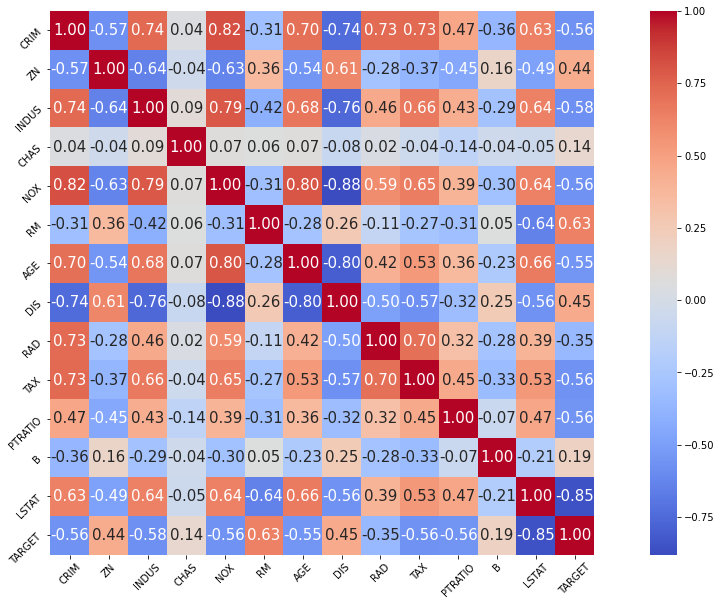

In [15]:
corr = boston_df.corr("spearman")  #Debido a que las variables no poseen distribución normal se utilizó el metodo de spearman
plt.figure(figsize=(20,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


-    Al observar la matriz de correlación, podemos ver que RM tiene una fuerte correlación positiva con TARGET (0,63) mientras que LSTAT tiene una alta correlación negativa con TARGET (-0,85)
-   Se elegi como atributo la variable LSTAT
  

In [16]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [17]:
# 2. Instanciar y entrenar acá.
reg_1 = LinearRegression()
reg_1.fit(X_train_f, y_train)
# 3. Predecir y evaluar acá.
y_test_predict_1 = reg_1.predict(X_test_f)
rmse = mean_squared_error(y_test, y_test_predict_1)
print("El error cuadrático medio para conjunto de test ")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

y_train_predict_1 = reg_1.predict(X_train_f)
rmse_1 = mean_squared_error(y_train, y_train_predict_1)
print("El error cuadrático medio para conjunto de train")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_1))

El error cuadrático medio para conjunto de test 
--------------------------------------
RMSE is 46.336305360025925
El error cuadrático medio para conjunto de train
--------------------------------------
RMSE is 36.52396640695966


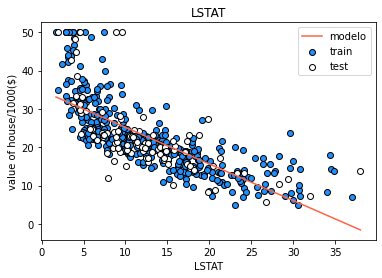

In [18]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, reg_1.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.ylabel('value of house/1000($)')
plt.xlabel('LSTAT')
plt.title(feature)
plt.legend()
plt.show()

**5. Responder acá**
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.
-   Como resultado de aplicar la regresión lineal para lograr predecir el precio, empleando un atributo/varible obtuvimos una línea recta, el cual es la que mejor se ajusta a los datos, de manera de minimizar la suma de residuo entre cada punto de los datos y el valor predicho. (El residuo es la distancia entre los datos originales y el valor predicho)

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [19]:
feature = 'LSTAT'  
selector = (boston['feature_names'] == feature)
X_train_p = X_train[:, selector]
X_test_p = X_test[:, selector]
X_train_p.shape, X_test_p.shape

((404, 1), (102, 1))

**1. Responder acá**

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = range(15)
train_errors = []
test_errors = []
for degree in degrees:
    
# A. Instancie y entrene una regresión polinomial.
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_p, y_train)
    
# B. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    y_train_pred = model.predict(X_train_p)
    y_test_pred = model.predict(X_test_p)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f'Grado del Polinomio: {degree}')
    print(f'Train error: {train_error:0.4}')
    print(f'Test error: {test_error:0.4}\n')

# C. Guarde los errores en una lista.
    train_errors.append(train_error)
    test_errors.append(test_error)

Grado del Polinomio: 0
Train error: 85.14
Test error: 81.58

Grado del Polinomio: 1
Train error: 36.52
Test error: 46.34

Grado del Polinomio: 2
Train error: 28.19
Test error: 38.85

Grado del Polinomio: 3
Train error: 26.78
Test error: 37.22

Grado del Polinomio: 4
Train error: 25.85
Test error: 34.7

Grado del Polinomio: 5
Train error: 25.03
Test error: 34.83

Grado del Polinomio: 6
Train error: 25.01
Test error: 34.33

Grado del Polinomio: 7
Train error: 25.01
Test error: 34.26

Grado del Polinomio: 8
Train error: 24.85
Test error: 36.42

Grado del Polinomio: 9
Train error: 24.83
Test error: 34.87

Grado del Polinomio: 10
Train error: 30.31
Test error: 62.89

Grado del Polinomio: 11
Train error: 57.89
Test error: 515.0

Grado del Polinomio: 12
Train error: 205.2
Test error: 4.272e+03

Grado del Polinomio: 13
Train error: 270.5
Test error: 1.16e+04

Grado del Polinomio: 14
Train error: 409.6
Test error: 7.782e+03



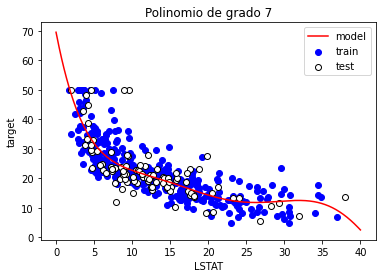

In [21]:
# Grafico del polinomio de grado 7, que es el que tiene el menor ECM en el test set 
pf = PolynomialFeatures(7)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_p, y_train)

plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
x = np.linspace(0, 40,500)
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.title('Polinomio de grado 7')
plt.xlabel('LSTAT')
plt.ylabel("target")
plt.show()

**2. Graficar curvas de error acá.**

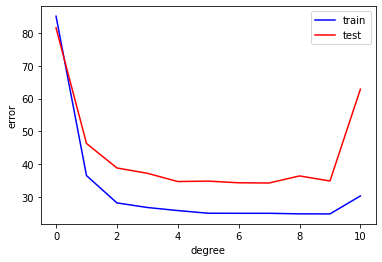

In [22]:
plt.plot(degrees[:11], train_errors[:11], color="blue", label="train")
plt.plot(degrees[:11], test_errors[:11], color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

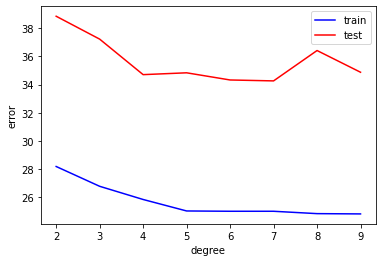

In [23]:
# zoom entre grados 2 y 9
plt.plot(degrees[2:10], train_errors[2:10], color="blue", label="train")
plt.plot(degrees[2:10], test_errors[2:10], color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**3. Responder acá**

EL polinomio de grado 7 es el que menor error cuadratico medio tiene, pero entre los de grado 4, 5, 6 y 7 la diferencia es muy pequeña, por lo tanto se podria elegir el de grado 4.

A partir de grado 10 ya tenemos sobreajuste, ya que el error en evaluación empieza a subir.

**4. Reconstruir mejor modelo acá y graficar.**

Analicemos los valores de los coeficientes de los polinomios de grados 4, 5, 6 y 7

In [24]:
for d in [4, 5, 6, 7]:
    pf = PolynomialFeatures(d)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_p, y_train)
    print(f'Grado del Polinomio: {d}')
    coefs = lr.coef_.round(decimals=4)
    print(f'Coeficientes: {coefs}')

Grado del Polinomio: 4
Coeficientes: [ 5.6383e+01 -6.7053e+00  4.6320e-01 -1.5100e-02  2.0000e-04]
Grado del Polinomio: 5
Coeficientes: [ 6.74171e+01 -1.20684e+01  1.31970e+00 -7.36000e-02  1.90000e-03
 -0.00000e+00]
Grado del Polinomio: 6
Coeficientes: [ 7.01669e+01 -1.37294e+01  1.66920e+00 -1.07400e-01  3.60000e-03
 -1.00000e-04  0.00000e+00]
Grado del Polinomio: 7
Coeficientes: [ 6.95306e+01 -1.32685e+01  1.54780e+00 -9.19000e-02  2.50000e-03
 -0.00000e+00 -0.00000e+00  0.00000e+00]


Podemos ver que en los polinomios de grado 5, 6 y 7, los coeficientes correspondientes a las potencias mayores a 4 son practicamente 0. Seleccionamos entonces como modelo el polinomio de grado 4, ya que tiene casi el mismo error que el de grado 7, pero menor complejidad

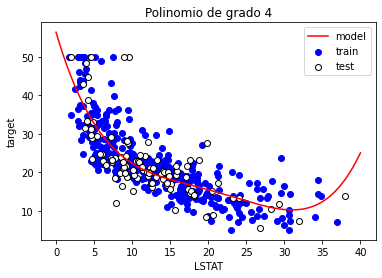

In [25]:
pf = PolynomialFeatures(4)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_p, y_train)

plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
x = np.linspace(0, 40,500)
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.title('Polinomio de grado 4')
plt.xlabel('LSTAT')
plt.ylabel("target")
plt.show()

**5. Responder acá**

El modelo parece ajustarse bastante bien a los datos en el rango de los mismos (1.73 a 37.97). Pero si nos dieran un nuevo dato con valor de LSTAT mayor a 40, probablemente este modelo no serviria para predecirlo ya que visualmente podemos ver que la tendencia de los datos es a mayor valor de LSTAT menor valor del target, pero el polinomio de grado 4, nuestro modelo, comienza a crecer a partir de LSTAT=30, con lo cual a mayores valores de LSTAT dara mayores valores del target.

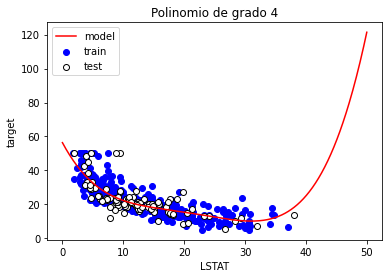

In [26]:
plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
x = np.linspace(0, 50,500)
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.title('Polinomio de grado 4')
plt.xlabel('LSTAT')
plt.ylabel("target")
plt.show()

Por lo tanto, si supiesemos que vamos a recibir mas datos fuera del rango de los que ya tenemos, quizas si convendria usar el polinomio de grado 7 que parece seguir la misma tendencia decreciente que los datos hasta LSTAT=47 aprox.

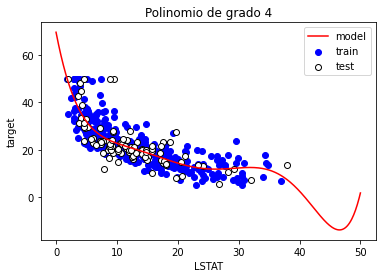

In [27]:
pf = PolynomialFeatures(7)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_p, y_train)

plt.scatter(X_train_p, y_train, color="blue", label="train")
plt.scatter(X_test_p, y_test, color="white", edgecolor="k", label="test")
x = np.linspace(0, 50,500)
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.title('Polinomio de grado 4')
plt.xlabel('LSTAT')
plt.ylabel("target")
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [28]:
# 1. Resolver acá. Ayuda (con dos atributos): 
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [29]:
# 2. Resolver acá.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degrees = range(1,9)
train_errors = []
test_errors = []
for degree in degrees:
    
# A. Instancie y entrene una regresión polinomial.
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
# B. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f'Grado del Polinomio: {degree}')
    print(f'Train error: {train_error:0.4}')
    print(f'Test error: {test_error:0.4}\n')

# C. Guarde los errores en una lista.
    train_errors.append(train_error)
    test_errors.append(test_error)

Grado del Polinomio: 1
Train error: 28.79
Test error: 37.38

Grado del Polinomio: 2
Train error: 18.66
Test error: 28.14

Grado del Polinomio: 3
Train error: 17.08
Test error: 28.57

Grado del Polinomio: 4
Train error: 14.19
Test error: 34.0

Grado del Polinomio: 5
Train error: 12.91
Test error: 34.2

Grado del Polinomio: 6
Train error: 12.35
Test error: 34.92

Grado del Polinomio: 7
Train error: 12.21
Test error: 70.28

Grado del Polinomio: 8
Train error: 11.94
Test error: 546.4



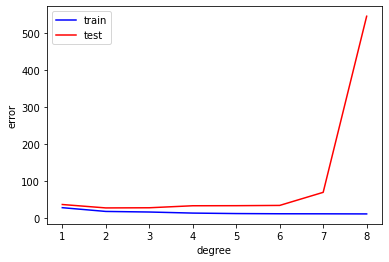

In [31]:
#Graficamos
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

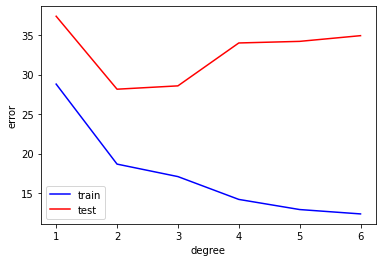

In [33]:
# zoom entre grados 1 y 6
plt.plot(degrees[:6], train_errors[:6], color="blue", label="train")
plt.plot(degrees[:6], test_errors[:6], color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

A partir de grado 7 comienza a haber sobreajuste, ya que el error en evaluación empieza a subir significativamente.

In [35]:
#Re entrenamos el mejor modelo
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_fs, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [36]:
#Mostramos el error
train_errors[degree-1], test_errors[degree-1] 

(18.659453833139377, 28.144971863123704)

In [54]:
# 3. Responder acá.

 Para este ejercicio se eligió un modelo con un polinomio de grado 2, ya que es el que menor error en test tenía. Esto mismo se observo al graficar la curva Error vs Grados del Polinomio en donde se observa que para polinomios de grado superior a 6 estamos ante un caso de sobreajuste de los datos (overfitting)

Como conclusión cuando se utiliza un solo atributo los mejores modelos se obtuvieron cuando se emplearon polinomios de grado mayor a 1 y menor 8, teniendo en cuenta que el modelo para un polinomio de grado uno 1 es el mismo que el modelo de regresión lineal simple. Además, se puede ver que al utilizar mas de un atributo tanto los errores de train como de test disminuyen, al compararlos con los errores cuando se empleó un solo atributo.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
